In [ ]:
from google.colab import files
uploaded = files.upload()



Saving PCOS_data.csv to PCOS_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
import joblib
import numpy as np  # if needed for input
import pandas as pd # if using DataFrame inputs

# Load the trained model
# model = joblib.load('/content/drive/MyDrive/PCOS_Modeltest.pkl')


#EVERY TIME RUN THIS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_frame=pd.read_csv('PCOS_data.csv')
data_frame.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
data_frame.drop(['Patient File No.', 'Unnamed: 44'] ,axis=1,inplace=True)

In [ ]:
data_frame.head()

,Sl. No,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.0,19.3,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.5,24.9,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,165.0,25.3,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,148.0,29.7,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.0,20.1,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
data_frame.isnull().sum()

,0
Sl. No,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0


In [ ]:
data_frame.fillna(0, inplace=True)


In [ ]:
data_frame.isnull().sum()

,0
Sl. No,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0


In [ ]:
data_frame.shape

(541, 43)

In [ ]:
print(data_frame.dtypes)


Sl. No                      int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/

In [ ]:
data_frame.select_dtypes(include='object').columns


Index(['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], dtype='object')

In [ ]:
print(data_frame['II    beta-HCG(mIU/mL)'].unique())


['1.99' '494.08' '801.45' '100.51' '158.51' '1214.23' '91.55' '749.98'
 '218.65' '13' '610.63' '4490.18' '11.24' '15' '768.03' '12' '10' '20'
 '30.66' '1455' '497.41' '167' '9.83' '141.06' '528.5' '177.57' '65.03'
 '173.66' '161.49' '3.98' '756.61' '255.02' '273.7' '14.46' '145.89'
 '100.09' '110.17' '174.37' '75.51' '3893.06' '600.23' '3350.19' '97.63'
 '14.4' '2' '177.58' '12.17' '25.3' '100.2' '479.66' '1.9' '586.06'
 '1.99.' '2.8' '15.36' '54.08' '152.13' '3.05' '201.36' '16069.69' '57.08'
 '232.71' '23.5' '180.3' '102.3' '481.3' '563.8' '4.32' '230.5' '155.3'
 '3.888' '523.6' '1.65' '3.83' '569.1' '236.5' '896.6' '2.58' '569.3'
 '108.66' '3.99' '121.8' '122.58' '355.28' '122.3' '596.2' '588.7' '147.6'
 '12.37' '144.63' '475.04' '515.53' '99.69' '70.42' '342.91' '148.52'
 '272.78' '355.51' '150.91' '391.46' '464.12' '41.77' '1390.58' '213.83'
 '45.9' '18.36' '154.48' '25000' '638.52' '4.76' '18.13' '89.34' '366.04'
 '14.34' '75.62' '4.96' '1134.4' '785.95' '229.86' '3.9' '297.21' '

In [ ]:
print(data_frame['II    beta-HCG(mIU/mL)'].unique())
print(data_frame['AMH(ng/mL)'].unique())


['1.99' '494.08' '801.45' '100.51' '158.51' '1214.23' '91.55' '749.98'
 '218.65' '13' '610.63' '4490.18' '11.24' '15' '768.03' '12' '10' '20'
 '30.66' '1455' '497.41' '167' '9.83' '141.06' '528.5' '177.57' '65.03'
 '173.66' '161.49' '3.98' '756.61' '255.02' '273.7' '14.46' '145.89'
 '100.09' '110.17' '174.37' '75.51' '3893.06' '600.23' '3350.19' '97.63'
 '14.4' '2' '177.58' '12.17' '25.3' '100.2' '479.66' '1.9' '586.06'
 '1.99.' '2.8' '15.36' '54.08' '152.13' '3.05' '201.36' '16069.69' '57.08'
 '232.71' '23.5' '180.3' '102.3' '481.3' '563.8' '4.32' '230.5' '155.3'
 '3.888' '523.6' '1.65' '3.83' '569.1' '236.5' '896.6' '2.58' '569.3'
 '108.66' '3.99' '121.8' '122.58' '355.28' '122.3' '596.2' '588.7' '147.6'
 '12.37' '144.63' '475.04' '515.53' '99.69' '70.42' '342.91' '148.52'
 '272.78' '355.51' '150.91' '391.46' '464.12' '41.77' '1390.58' '213.83'
 '45.9' '18.36' '154.48' '25000' '638.52' '4.76' '18.13' '89.34' '366.04'
 '14.34' '75.62' '4.96' '1134.4' '785.95' '229.86' '3.9' '297.21' '

In [ ]:
# Remove any non-numeric characters except '.' using regex
data_frame['II    beta-HCG(mIU/mL)'] = data_frame['II    beta-HCG(mIU/mL)'].astype(str).str.replace('[^0-9.]', '', regex=True)
data_frame['AMH(ng/mL)'] = data_frame['AMH(ng/mL)'].astype(str).str.replace('[^0-9.]', '', regex=True)


In [ ]:
data_frame['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data_frame['II    beta-HCG(mIU/mL)'], errors='coerce')
data_frame['AMH(ng/mL)'] = pd.to_numeric(data_frame['AMH(ng/mL)'], errors='coerce')


In [ ]:
data_frame['II    beta-HCG(mIU/mL)'].fillna(0, inplace=True)


/tmp/ipython-input-1294308492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['II    beta-HCG(mIU/mL)'].fillna(0, inplace=True)


In [ ]:
print(data_frame.dtypes)


Sl. No                      int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/

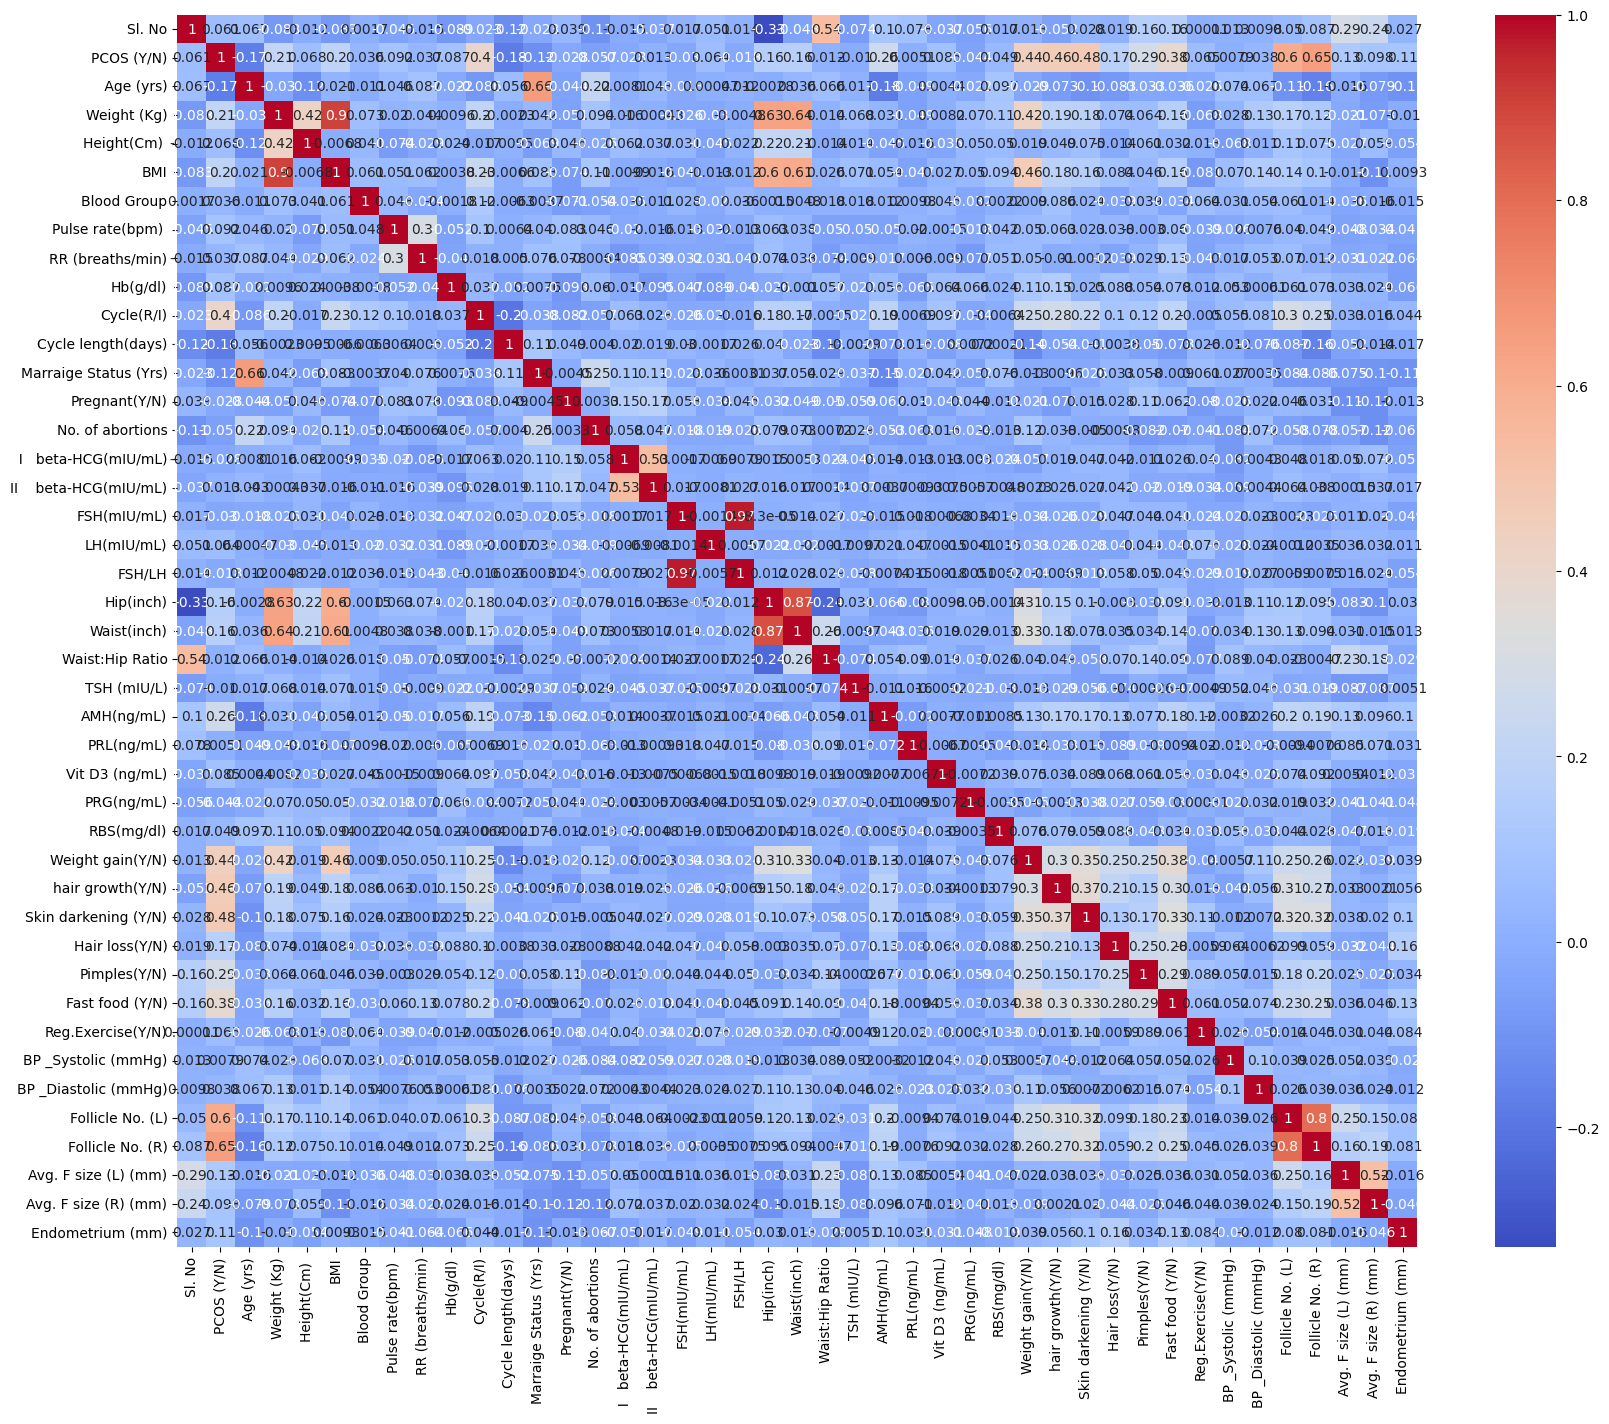

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(data_frame.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
corr_matrix = data_frame.corr()
target_corr = corr_matrix['PCOS (Y/N)'].sort_values(ascending=False)
print(target_corr)


PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.378720
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199697
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group         

<Axes: >

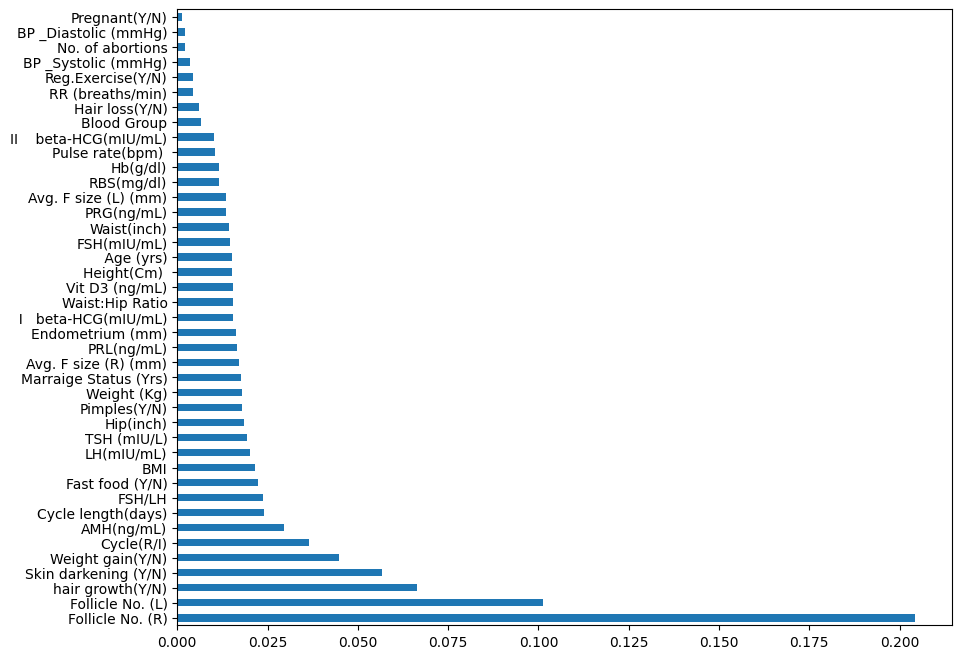

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_feature_tool = data_frame.drop(columns=['PCOS (Y/N)', 'Sl. No'])
y_feature_tool = data_frame['PCOS (Y/N)']

model = RandomForestClassifier()
model.fit(X_feature_tool, y_feature_tool)

# Show importance
importances = model.feature_importances_
features = pd.Series(importances, index=X_feature_tool.columns)
features.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8))


In [ ]:
columns_to_drop = [
    'Pregnant(Y/N)',
    'BP _Diastolic (mmHg)',
    'Reg.Exercise(Y/N)',
    'No. of abortions',
    'BP _Systolic (mmHg)',
    'Hair loss(Y/N)',
    'RR (breaths/min)',
    'Blood Group',
    'Pulse rate(bpm) ',
    'II    beta-HCG(mIU/mL)',
    'Hb(g/dl)',
    'PRG(ng/mL)',
    'Waist:Hip Ratio',
    'RBS(mg/dl)',
    'Waist(inch)',
    'Marraige Status (Yrs)',
    'Avg. F size (R) (mm)',
    '  I   beta-HCG(mIU/mL)',
    'Pimples(Y/N)',
    'Vit D3 (ng/mL)',
    'FSH(mIU/mL)',
    'Avg. F size (L) (mm)',
    'Height(Cm) ',
    'PRL(ng/mL)',
    'TSH (mIU/L)',
]


In [ ]:
df_cleaned = data_frame.drop(columns=columns_to_drop)
final_model_features=[' Age (yrs)', 'Weight (Kg)', 'BMI',
'Cycle(R/I)', 'Cycle length(days)', 'LH(mIU/mL)', 'FSH/LH',
 'Hip(inch)', 'AMH(ng/mL)', 'Weight gain(Y/N)',
 'hair growth(Y/N)', 'Skin darkening (Y/N)',
 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Endometrium (mm)']

In [ ]:
print(final_model_features)

[' Age (yrs)', 'Weight (Kg)', 'BMI', 'Cycle(R/I)', 'Cycle length(days)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Endometrium (mm)']


In [ ]:
X_train_model = df_cleaned[final_model_features]
y_train_model = df_cleaned['PCOS (Y/N)']

In [ ]:
print(X_train_model.columns.tolist())


[' Age (yrs)', 'Weight (Kg)', 'BMI', 'Cycle(R/I)', 'Cycle length(days)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Endometrium (mm)']


In [ ]:
df_cleaned.to_csv('df_cleaned.csv', index=False)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_model, y_train_model, test_size=0.2, random_state=42)

In [ ]:
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, X_train_model, y_train_model, cv=5)
print("Cross-validation scores:", scores)
print("Average CV accuracy:", scores.mean())


Cross-validation scores: [0.91743119 0.91666667 0.83333333 0.93518519 0.76851852]
Average CV accuracy: 0.8742269792728509


In [ ]:
import joblib
joblib.dump((final_model, final_model_features), '/content/drive/MyDrive/PCOS_Modeltest.pkl')
print("✅ Model saved to Google Drive: /content/drive/MyDrive/PCOS_Modeltest.pkl")

✅ Model saved to Google Drive: /content/drive/MyDrive/PCOS_Modeltest.pkl


In [4]:
import joblib
final_model, feature_columns = joblib.load('/content/drive/MyDrive/PCOS_Modeltest.pkl')

sample_input = pd.DataFrame([[
  26, 68, 28.1, 1, 40, 10.2, 2.0, 38, 6.5, 1, 1, 0, 1, 15, 14, 6.0 # Added placeholder
]], columns=feature_columns)


prediction = final_model.predict(sample_input)
probability = final_model.predict_proba(sample_input)

print("Prediction:", "PCOS" if prediction[0] == 1 else "No PCOS")
print("Probability of PCOS:", round(probability[0][1] * 100, 2), "%")

Prediction: PCOS
Probability of PCOS: 79.0 %


SECOND MODEL WITHOUT TESTS


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import joblib

# Remove leading/trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Define features for second model
second_model_features = [
    'Age (yrs)',
    'Weight (Kg)',
    'BMI',                  # If BMI not available, can be calculated
    'Cycle(R/I)',
    'Cycle length(days)',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)',
    'Fast food (Y/N)'
]

# Prepare data for second model
X2 = df_cleaned[second_model_features]
y2 = df_cleaned['PCOS (Y/N)']

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# Train Random Forest
second_model = RandomForestClassifier(random_state=42)
second_model.fit(X2_train, y2_train)

# Cross-validation scores
scores2 = cross_val_score(second_model, X2, y2, cv=5)
print("Second model CV scores:", scores2)
print("Average accuracy:", scores2.mean())

# Save second model + features
joblib.dump((second_model, second_model_features), '/content/drive/MyDrive/PCOS_Model_NoTests.pkl')
print("Second model saved successfully!")

Second model CV scores: [0.88990826 0.84259259 0.71296296 0.84259259 0.69444444]
Average accuracy: 0.7965001698946652
Second model saved successfully!


In [3]:
# Mount Drive again if in new session
drive.mount('/content/drive')

# Load model
second_model, feature_columns2 = joblib.load('/content/drive/MyDrive/PCOS_Model_NoTests.pkl')

# Example input for second model
sample_input2 = pd.DataFrame([[
    26, 68, 28.1, 1, 40, 1, 1, 0, 1
]], columns=feature_columns2)

# Predict
prediction2 = second_model.predict(sample_input2)
probability2 = second_model.predict_proba(sample_input2)

print("Prediction:", "PCOS" if prediction2[0] == 1 else "No PCOS")
print("Probability of PCOS:", round(probability2[0][1] * 100, 2), "%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Prediction: PCOS
Probability of PCOS: 57.0 %


FileNotFoundError: Cannot find file: PCOS_Model_Notests.pkl